 # ESTADÍSTICA 2.  PRÁCTICA 1.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

* (20/11/2021) Envío por correo. 

* (22/11/2021) Feedback 1. 

* (24/11/2021) Envío por correo. Las sugerencias recibidas como primer feedback las marco en color <font color='green'>**verde**</font>.


In [1]:
# We need some libraries
require(gridExtra)
library(ggplot2)
library(gtable)
library(grid)

Loading required package: gridExtra


### OBSERVACIÓN DE 1 MUESTRA DE TAMAÑO N = 10000 DE UNA POBLACIÓN NORMAL.

<font color='blue'>***1.- Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m. Dibuja la densidad de frecuencia y la densidad de probabilidad por separado. Compara μ y σ con la media muestral y la varianza muestral.***</font>

In [2]:
N <- 10000                # Sample size
population_mean <- 1.78   # Thoretical mean
population_sd <- 0.1      # Theoretical standad deviation
set.seed(11)              # Set seed (not neccessary)
sample_heights <- rnorm(n = N, mean = population_mean, sd = population_sd) # Random sample

Comparamos la media poblacional $\mu$ con la media muestral $\bar{X}$.

In [3]:
sample_mean <- mean(sample_heights)
print(paste('Population mean: ', population_mean))
print(paste('Sample mean:     ' ,sample_mean))

[1] "Population mean:  1.78"
[1] "Sample mean:      1.78113716677407"


Comparamos la varianza poblacional $S^{2}$ con la varianza muestral $Var[X]$. Puetso que para calcular la varianza muestral hemos empleado lel comando `var` de `R`, estamos aplicando la fórmula no sesgada, es decir, la que aplica la corrección de Bessel y multiplica por $\frac{1}{n-1}$.

In [4]:
sample_var <- var(sample_heights)
print(paste('Population var: ', population_sd ^ 2))
print(paste('Sample var:     ', sample_var))

[1] "Population var:  0.01"
[1] "Sample var:      0.00986812012246902"


Dibujamos el gráfico de **frecuencias absolutas**. Puesto que la *altura* es una variable aleatoria continua, empleamos 
un histograma. Dejamos que los breaks (división en subintervalos) los haga de manera automática. 

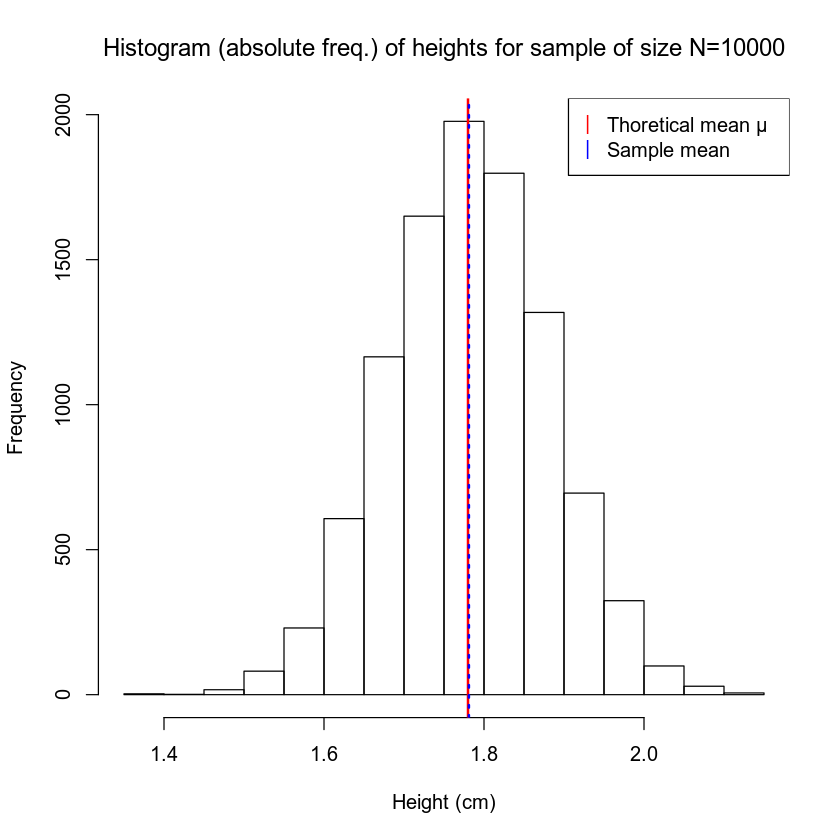

In [5]:
hist(sample_heights,
     xlab = 'Height (cm)',
     main = substitute(paste('Histogram (absolute freq.) of heights for sample of size N=', N), list(N = N)))
abline(v = population_mean, col = 'red', lwd = 2)
abline(v = sample_mean, col = 'blue', lty = 3, lwd = 2)
legend("topright", legend = c("Thoretical mean μ", "Sample mean") , pch = "|", col = c("red", "blue"))

Dibujamos el histograma de **frecuencias relativas**.

In [6]:
my_hist <- hist(sample_heights, plot = FALSE)
my_hist$density <- my_hist$counts/sum(my_hist$counts)
print(sum(my_hist$density) == 1) # Check sum of relative frequencies.

[1] TRUE


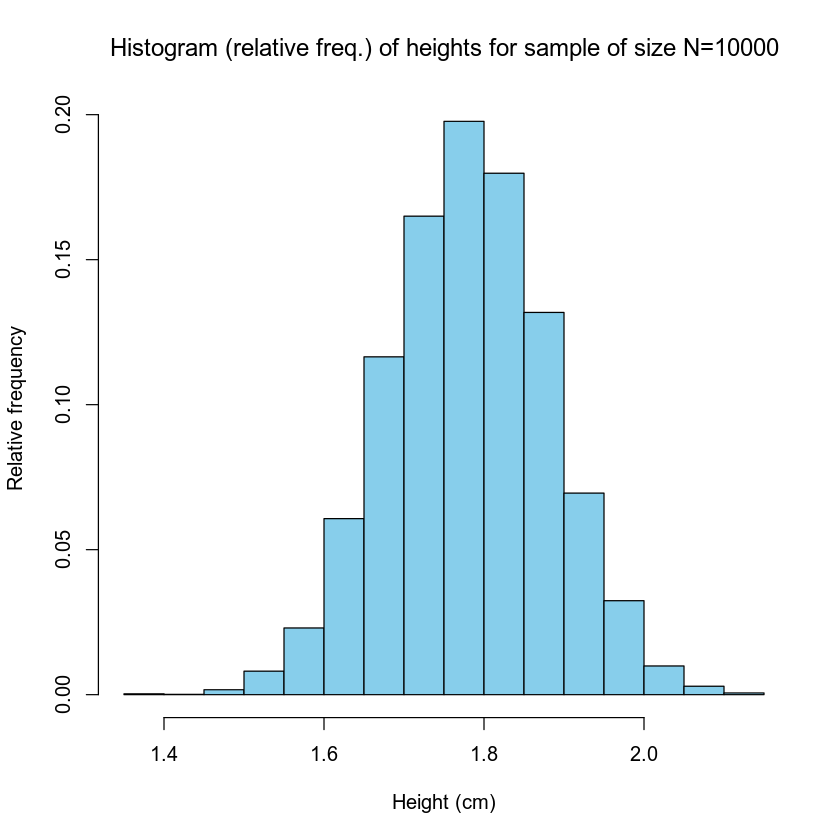

In [7]:
plot(my_hist,
     freq = F,
     xlab = 'Height (cm)',
     ylab = 'Relative frequency',
     main = substitute(paste('Histogram (relative freq.) of heights for sample of size N=', N), list(N = N)),
     col = 'skyblue')

Dibujamos el histograma para **densidad de probabilidad** (probability density). Para ello, empleamos la opción `freq = FALSE`.

<font color='green'>**Pintamos la función de densidad de una normal de media igual a la media muestral y desviación típica igual a la desviación típica muestral**</font>.

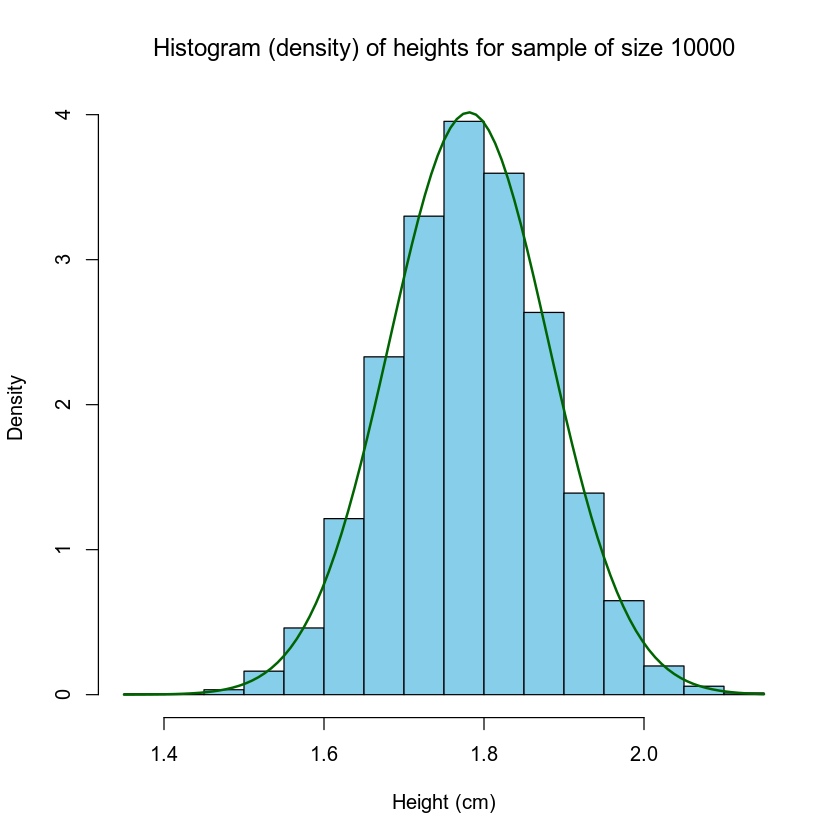

In [8]:
x <-  seq(min(sample_heights), max(sample_heights), by = 0.01)
hist(sample_heights,
     freq = F,
     xlab = 'Height (cm)',
     main = substitute(paste('Histogram (density) of heights for sample of size ', N), list(N = N)),
     col = 'skyblue')
curve(dnorm(x, mean = sample_mean, sd = sqrt(sample_var)), 
      col = "darkgreen", lwd = 2, add = TRUE, yaxt = "n")

### OBSERVACIÓN DE M MUESTRAS DE TAMAÑO N DE UNA POBLACIÓN NORMAL

### ESTIMADOR MEDIA MUESTRAL

<font color='blue'>***2.- Considera la distribución de probabilidad anterior y el estimador media muestral para una muestra de tamaño N (muN).***</font>

<font color='blue'>***2.1 Generar un número alto M = 10000 de muestras y pinta la distribución (μ-TN), para N = 10, 100, 1000, 10000.*** </blue>

Generamos M=10000 muestras de tamaño N=10 y las almacenamos en la matriz `sample_10`.

In [9]:
M <- 10000
N <- 10
set.seed(12)
sample_10 <- replicate(M, rnorm(n = N, mean = population_mean, sd = population_sd))

Calculamos la media de cada una de las M=10000 muestras de tamaño N=10 observadas. Aplicamos la funcion `mean` por columnas.

Diremos que $T_{i,N}$ es el valor del estimador media muestral para la muestra $i=1,2,...,M$ de tamaño $N$. 

En este caso, tenemos un conjunto de M=10000 valores del estimador media muestral $\{T_{i,10}\}_{i=1}^{M}$.

In [10]:
sample_mean_10 <- apply(sample_10, 2, mean)

Dibujamos la distribución ($\mu$ - $T_{i,10}$) para $i=1,2,\dotsc,M$.

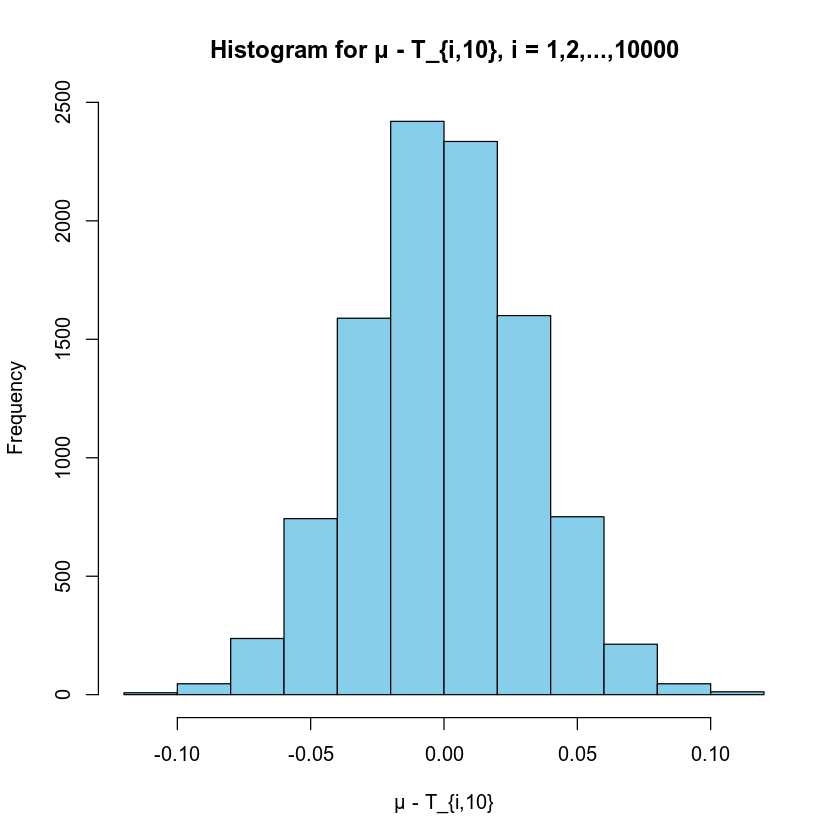

In [11]:
hist(population_mean - sample_mean_10,
    col = 'skyblue',
    main = 'Histogram for μ - T_{i,10}, i = 1,2,...,10000',
    xlab = 'μ - T_{i,10}')

Repetimos lo anterior con las nuevas M=10000 muestras observadas en las que difiere el tamaño de las mismas, ahora es N = 100.

In [12]:
N <- 100
set.seed(13)
sample_100 <- replicate(M, rnorm(n = N, mean = population_mean, sd = population_sd))

In [13]:
sample_mean_100 <- apply(sample_100, 2, mean)

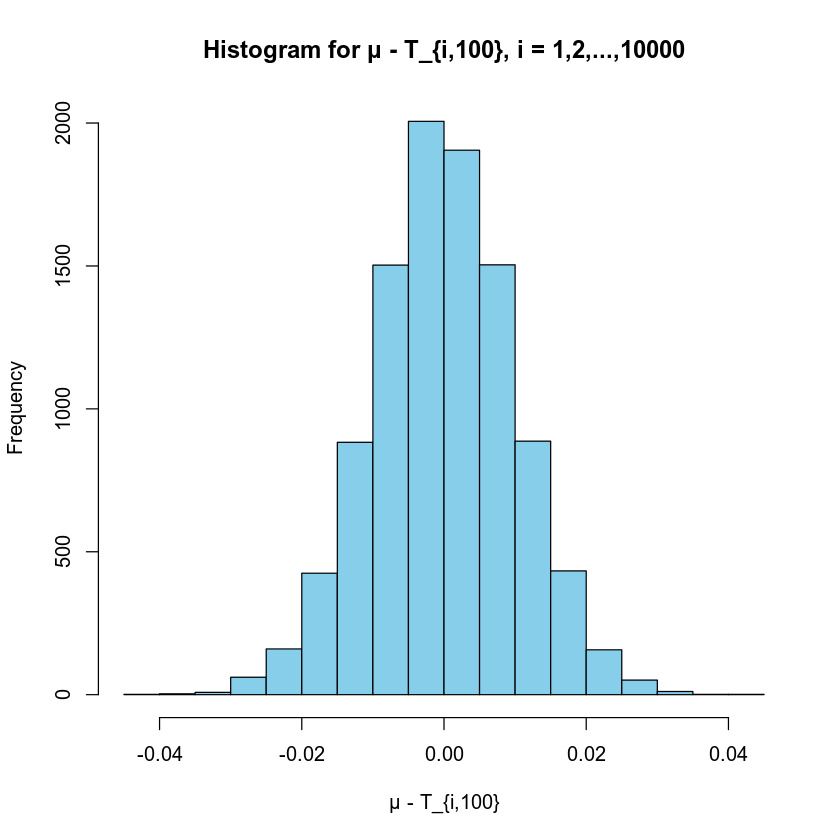

In [14]:
hist(sample_mean_100 - population_mean,
     col = 'skyblue',
     main = 'Histogram for μ - T_{i,100}, i = 1,2,...,10000',
     xlab = 'μ - T_{i,100}')

Repetimos lo anterior con las nuevas M=10000 muestras observadas en las que difiere
el tamaño de las mismas, ahora es N = 1000.

In [15]:
N <- 1000
set.seed(14)
sample_1000 <- replicate(M, rnorm(n = N, mean = population_mean, sd = population_sd))

In [16]:
sample_mean_1000 <- apply(sample_100, 2, mean)

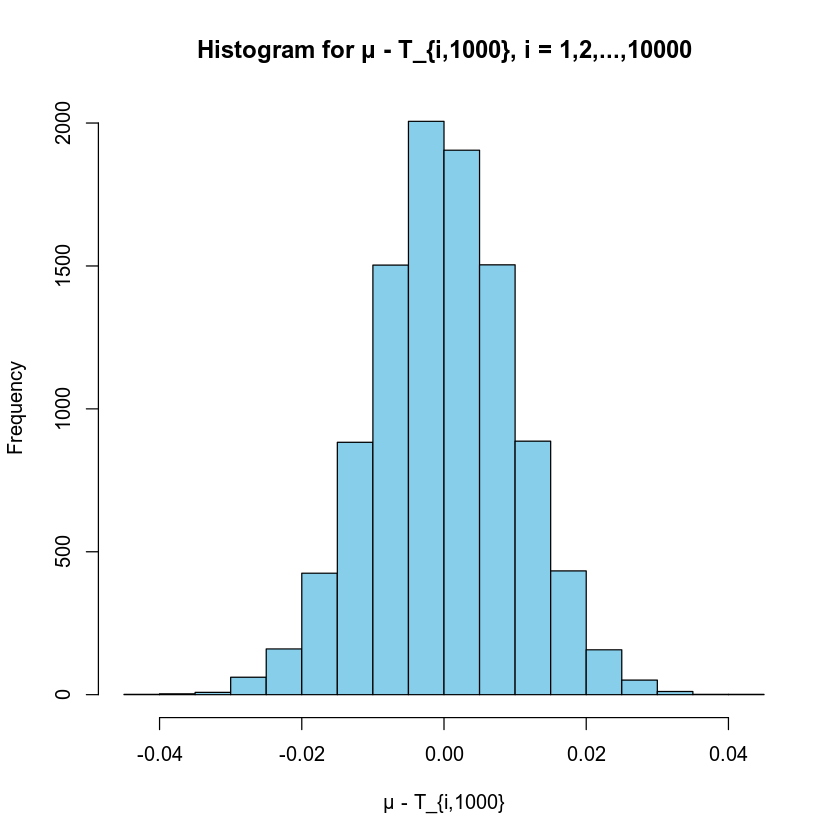

In [17]:
hist(sample_mean_1000 - population_mean,
     col = 'skyblue',
     main = 'Histogram for μ - T_{i,1000}, i = 1,2,...,10000',
     xlab = 'μ - T_{i,1000}')

Repetimos lo anterior con las nuevas M=10000 muestras observadas en las que difiere
el tamaño de las mismas, ahora es N=10000.

In [18]:
N <- 10000
set.seed(15)
sample_10000 <- replicate(M, rnorm(n = N, mean = population_mean, sd = population_sd))

In [19]:
sample_mean_10000 <- apply(sample_10000, 2, mean)

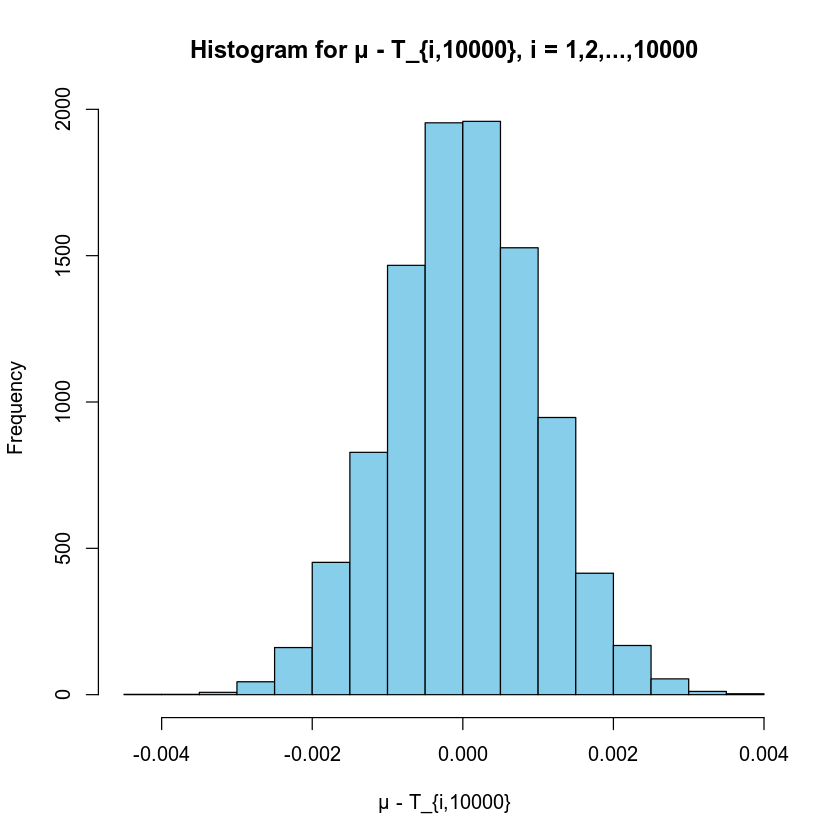

In [20]:
hist(sample_mean_10000 - population_mean,
      col = 'skyblue',
      main = 'Histogram for μ - T_{i,10000}, i = 1,2,...,10000',
      xlab = 'μ - T_{i,10000}')

## MEDIA DE LOS ESTIMADORES MEDIA MUESTRAL

<font color='blue'>***2.2 Asumiendo que el valor esperado puede calcularse como el promedio a los M pseudo-experimentos: calcula el valor esperado de muN y dibuja el resultado en función de N.***</font>

Se nos pide que calculemos la esperanza y que para ello la aproximemos como el promedio a M elementos. **Asumo que esos M elementos se refieren a los los M estimadores $\{T_{i,N}\}_{i=1}^{M}$.** 

<font color='red'>**Alternativa 1:** ¿Considerar M nuevos elementos aleatorios?
    **Alternativa 2:** ¿Dada las M muestras de tamaño N, escoger un subconjunto de tamaño M del total de las M$\cdot$N observaciones ó realizaciones? **Alternativa 3:** no más ideas ¿?**</font>

Para las M=10000 muestras de tamaño N=10, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [21]:
mean_sample_mean_10 <- mean(sample_mean_10)

In [22]:
print(paste('Esperanza de los estimadores media muestral {T_{i,10}}_{i=1}^{M}$: ',
             mean_sample_mean_10))

[1] "Esperanza de los estimadores media muestral {T_{i,10}}_{i=1}^{M}$:  1.78004273701069"


Para las  M=10000 muestras de tamaño N=100, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [23]:
mean_sample_mean_100 <- mean(sample_mean_100)

In [24]:
print(paste('Esperanza de los estimadores media muestral {T_{i,100}}_{i=1}^{M}$: ',
            mean_sample_mean_100))

[1] "Esperanza de los estimadores media muestral {T_{i,100}}_{i=1}^{M}$:  1.77994291957649"


Para las  M=10000 muestras de tamaño N=1000, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [25]:
mean_sample_mean_1000 <- mean(sample_mean_1000)

In [26]:
print(paste('Esperanza de los estimadores media muestral {T_{i,1000}}_{i=1}^{M}$: ',
            mean_sample_mean_1000))

[1] "Esperanza de los estimadores media muestral {T_{i,1000}}_{i=1}^{M}$:  1.77994291957649"


Para las  M=10000 muestras de tamaño N=10000, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [27]:
mean_sample_mean_10000 <- mean(sample_mean_10000)

In [28]:
print(paste('Esperanza de los estimadores media muestral {T_{i,10000}}_{i=1}^{M}$: ',
            mean_sample_mean_1000))

[1] "Esperanza de los estimadores media muestral {T_{i,10000}}_{i=1}^{M}$:  1.77994291957649"


Dibujamos el resultado. En el eje horizontal, situamos el tamaño muestral N. En el eje vertical, situamos el valor obtenido para la esperanza. En rojo puntamos la media (esperanza) teórica proporcionada por el enunciado. 

 <font color='green'>**No modifico este plot**</font>.

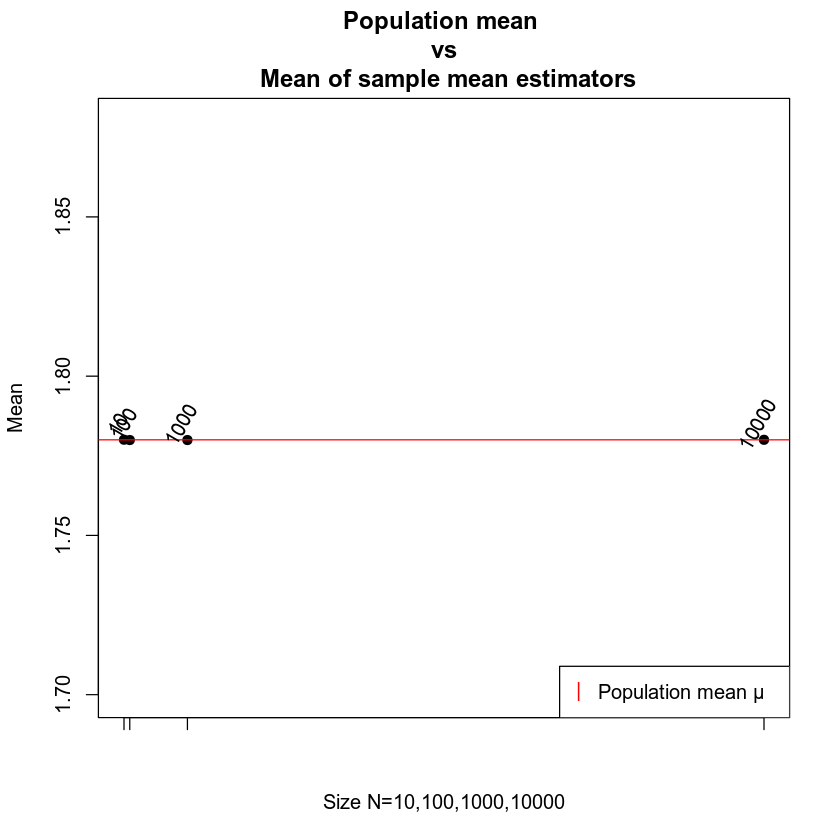

In [29]:
x <- c(10, 100, 1000, 10000)
y <- c(mean_sample_mean_10, mean_sample_mean_100, mean_sample_mean_1000, mean_sample_mean_10000)
plot(x    = x, 
     y    = y,
     ylim = c(1.7, population_mean + 0.1),
     xaxt = 'n',
     xlab = 'Size N=10,100,1000,10000',
     ylab = 'Mean',
     main = paste("Population mean", '\n', 'vs', '\n', 'Mean of sample mean estimators'),
     pch  = 19)   
axis(side = 1, at = x, labels = F, las = 2)
abline(h = population_mean, col = 'red')
text(x, y, as.character(x), srt = 60, pos = 3)
legend("bottomright", legend = "Population mean μ", pch = "|", col = "red")

## VARIANZA DE LOS ESTIMADORES MEDIA MUESTRAL

<font color='blue'>***2.2 Asumiendo que la varianza puede calcularse como la varianza a los M pseudo-experimentos: calcula la varianza para cada muN y dibuja el resultado en función de N.*** </font>


Se nos pide que calculemos la varianza y que para ello la aproximemos como el promedio a M elementos. **Asumo que esos M elementos se refieren a los los M estimadores $\{T_{i,N}\}_{i=1}^{M}$.** 

<font color='red'>**Alternativa 1:** ¿Considerar M nuevos elementos aleatorios?
    **Alternativa 2:** ¿Dada las M muestras de tamaño N, escoger un subconjunto de tamaño M del total de las M$\cdot$N observaciones ó realizaciones? **Alternativa 3:** no más ideas ¿?**</font>


Calculamos la varianza (con el comando de `R`, que lo hace empleando la corrección de Bessel, es decir, multiplica por $\frac{1}{n-1}$.

Para las M=10000 muestras de tamaño N=10, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [30]:
var_sample_mean_10 <- var(sample_mean_10)

In [31]:
print(paste('Varianza de los estimadores media muestral {T_{i,10}}_{i=1}^{M}$: ',
            var_sample_mean_10))

[1] "Varianza de los estimadores media muestral {T_{i,10}}_{i=1}^{M}$:  0.000995691037351685"


Para las  M=10000 muestras de tamaño N=100, , empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [32]:
var_sample_mean_100 <- var(sample_mean_100)

In [33]:
print(paste('Varianza de los estimadores media muestral {T_{i,100}}_{i=1}^{M}$: ',
            var_sample_mean_100))

[1] "Varianza de los estimadores media muestral {T_{i,100}}_{i=1}^{M}$:  9.91106401104008e-05"


Para las  M=10000 muestras de tamaño N=1000, empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [34]:
var_sample_mean_1000 <- var(sample_mean_1000)

In [35]:
print(paste('Varianza de los estimadores media muestral {T_{i,1000}}_{i=1}^{M}$: ',
            var_sample_mean_1000))

[1] "Varianza de los estimadores media muestral {T_{i,1000}}_{i=1}^{M}$:  9.91106401104008e-05"


Para las M=10000 muestras de tamaño N=10000, , empleamos los estimadores media muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [36]:
var_sample_mean_10000 <- var(sample_mean_10000)

In [37]:
print(paste('Varianza de los estimadores media muestral {T_{i,10000}}_{i=1}^{M}$: ',
            var_sample_mean_10000))

[1] "Varianza de los estimadores media muestral {T_{i,10000}}_{i=1}^{M}$:  9.83568997325338e-07"


<font color='green'>**Sí modifico este plot. Dejo la idea anterior comentada y pongo la corrección en la siguienrte celda.**</font>

<font color='green'>Dado que los puntos de las varianzas de los de los $M$ estimadores media muestral para cada $N$ quedan muy por debajo de la linea que marca la varianza poblacional, mi objetivo es dividir el eje vertical (que contiene los valores de la varianza) en dos intervalos: uno de ellos que contenga los valores de las varianzas de los estimadores y otro que contenga la varianza poblacional.</font>


<font color='green'>Recordemos que estamos considerando $M=10000$ muestras para cada tamaño $N=10,100,1000,10000$. Hemos hecho la media para cada muestra (estimador media muestral) y, acontinuación, la varianza de todas ellas.<font>
    
    
    
<font color='green'>En el plot, pintamos, en la parte superior, una linea verde que señala la varianza poblacional. En la parte inferior, recogemos las varianzas de los $M$ estimadores media muestral para cada $N$, que marcamos con una etiqueta. Unimos los 4 puntos con una linea para que se aprecie mejor la tendencia.<font>

In [38]:
#plot(x    = x, 
#     y    = c(var_sample_mean_10, var_sample_mean_100, var_sample_mean_1000, var_sample_mean_10000),
#     ylim = c(0, population_sd ^ 2),
#     xaxt = 'n',
#     xlab = 'Size N=10,100,1000,10000',
#     ylab = 'Variance')   
#axis(side = 1, at = x, labels = F, las = 2)
#abline(h = population_sd ^ 2, col = 'red')
#legend("bottomright", legend = "Thoretical var  σ^2", pch = "|", col = "red")

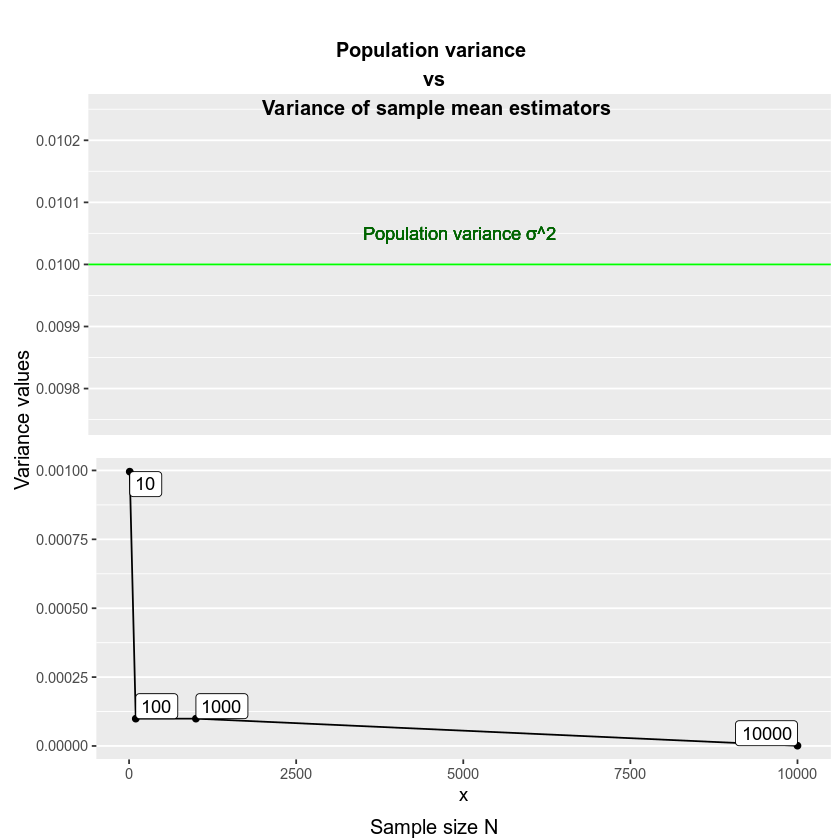

In [39]:
y <- c(var_sample_mean_10, var_sample_mean_100, var_sample_mean_1000, var_sample_mean_10000)

df <- data.frame(x = x, y = y)

p <- ggplot(df, aes(x, y)) +
        geom_line() +
        geom_point() +
        geom_label(label = as.character(x), vjust = 'inward', hjust = 'inward') +
        theme(axis.title.y = element_blank(),
              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.minor.x = element_blank())

        

q <- ggplot(df, aes(x, y)) +
     geom_hline(yintercept = population_sd ^ 2, col = 'green') +
     geom_text(aes(1000, population_sd ^ 2 + 0.00005), label = 'Population variance σ^2', col = 'darkgreen') +
     scale_y_continuous(limits = c(population_sd ^ 2 - 0.00025, population_sd ^ 2 + 0.00025)) +
     theme(axis.title.x = element_blank(),
           axis.text.x  = element_blank(),
           axis.ticks.x = element_blank(),
           axis.title.y = element_blank(),
           panel.border = element_blank(),
           panel.grid.major.x = element_blank(),
           panel.grid.minor.x = element_blank())


grid.arrange(arrangeGrob(q + theme(legend.position = "none"),
                         p + theme(legend.position = "none"),
                         ncol = 1,
                         top = textGrob(paste("Population variance", '\n', 'vs', '\n', 'Variance of sample mean estimators'), vjust = 1, gp = gpar(fontface = "bold", cex = 1))),
                         left = textGrob("Variance values", rot = 90, vjust = 1),
                         bottom = textGrob("Sample size N"))

## ESTIMADOR VARIANZA MUESTRAL

<font color='blue'>***3.- Repetir 2) pero usando el estimador "varianza muestral" (con la fórmula sesgada).***</font>

Diremos que $T_{i,N}'$ es el valor del estimador varianza muestral para la muestra $i=1,2,...,M$ de tamaño $N$. 

Para las M=10000 muestras de tamaño N=10 que teniamos almacenadas en la matriz `sample_10`, calculamos la varianza por columnas. 

Puesto que `R` utiliza la corrección de Bessel para el cálculo de la varianza, nos definimos nuestra propia funcion.

In [40]:
bias_var <- function(col){
    return((1 / length(col)) * sum((col - mean(col)) ^ 2))
}

sample_var_10 <- apply(sample_10, 2, bias_var)

Para las M=10000 muestras de tamaño N=100 que teniamos almacenadas en la matriz `sample_100`, calculamos la varianza por columnas:

In [41]:
sample_var_100 <- apply(sample_100, 2, bias_var)

Para las M=10000 muestras de tamaño N=1000 que teniamos almacenadas en la matriz `sample_1000`, calculamos la varianza por columnas:

In [42]:
sample_var_1000 <- apply(sample_1000, 2, bias_var)

Para las M=10000 muestras de tamaño N=10000 que teniamos almacenadas en la matriz `sample_10000`, calculamos la varianza por columnas:

In [43]:
sample_var_10000 <- apply(sample_10000, 2, bias_var)

## MEDIA DE LOS ESTIMADORES VARIANZA MUESTRAL

<font color='red'>**Mismo problema al señalado antes en rojo**</font>

Para las M = 10000 muestras de tamaño N=10, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [44]:
mean_sample_var_10 <- mean(sample_var_10)

In [45]:
print(paste('Esperanza de los estimadores varianza muestral {T_{i,10}\'}_{i=1}^{M}$: ',
            mean_sample_var_10))

[1] "Esperanza de los estimadores varianza muestral {T_{i,10}'}_{i=1}^{M}$:  0.00898206696375062"


Para las  M = 10000 muestras de tamaño N=100, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [46]:
mean_sample_var_100 <- mean(sample_var_100)

In [47]:
print(paste('Esperanza de los estimadores varianza muestral {T_{i,100}\'}_{i=1}^{M}$: ',
            mean_sample_var_100))

[1] "Esperanza de los estimadores varianza muestral {T_{i,100}'}_{i=1}^{M}$:  0.00989041988241391"


Para las  M = 10000 muestras de tamaño N=1000, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$

In [48]:
mean_sample_var_1000 <- mean(sample_var_1000)

In [49]:
print(paste('Esperanza de los estimadores varianza muestral {T_{i,1000}\'}_{i=1}^{M}$: ',
            mean_sample_var_1000))

[1] "Esperanza de los estimadores varianza muestral {T_{i,1000}'}_{i=1}^{M}$:  0.00999019896538459"


Para las  M = 10000 muestras de tamaño N=10000, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [50]:
mean_sample_var_10000 <- mean(sample_var_10000)

In [51]:
print(paste('Esperanza de los estimadores varianza muestral {T_{i,10000}\'}_{i=1}^{M}$: ',
            mean_sample_var_10000))

[1] "Esperanza de los estimadores varianza muestral {T_{i,10000}'}_{i=1}^{M}$:  0.00999993936219892"


Dibujamos el resultado. En el eje horizontal, situamos el tamaño muestral N. En el eje vertical, situamos el valor esperado:


<font color='green'>**Sí modifico este plot. Lo dejo comemtado y pongo la corrección en la siguienrte celda. Para cambiar la escala en el eje vertical, lo dividiré en dos. Sitúo la leyenda en otra posición.**</font>.


<font color='green'>Dado que los puntos de las medias de los $M$ estimadores varianza muestral para cada $N$ quedan muy por debajo de la linea que marca la media poblacional, mi objetivo es dividir el eje vertical (que contiene los valores de la media) en dos intervalos: uno de ellos que contenga los valores de las medias de los estimadores y otro que contenga la media poblacional.</font>


<font color='green'>Recordemos que estamos considerando $M=10000$ muestras para cada tamaño $N=10,100,1000,10000$. Hemos hecho la varianza para cada muestra (estimador varianza muestral) y, acontinuación, la media de todas ellas.<font>
    
    
    
<font color='green'>En el plot, pintamos, en la parte superior, una linea roja que señala la media poblacional. En la parte inferior, recogemos las medias de los $M$ estimadores varianza muestral para cada $N$, que marcamos con una etiqueta. Unimos los 4 puntos con una linea para que se aprecie mejor la tendencia.<font>

In [52]:
#x <- c(10, 100, 1000, 10000)
#plot(x    = x, 
#     y    = c(mean_sample_var_10, mean_sample_var_100, mean_sample_var_1000, mean_sample_var_10000),
#     ylim = c(0, population_mean),
#     xaxt = 'n',
#     xlab = 'Size N=10,100,1000,10000',
#     ylab = 'Mean')   
#axis(side = 1, at = x, labels = F, las = 2)
#abline(h = population_mean, col = 'red')
#legend("bottomright", legend = "Thoretical mean μ", pch = "|", col = "red")

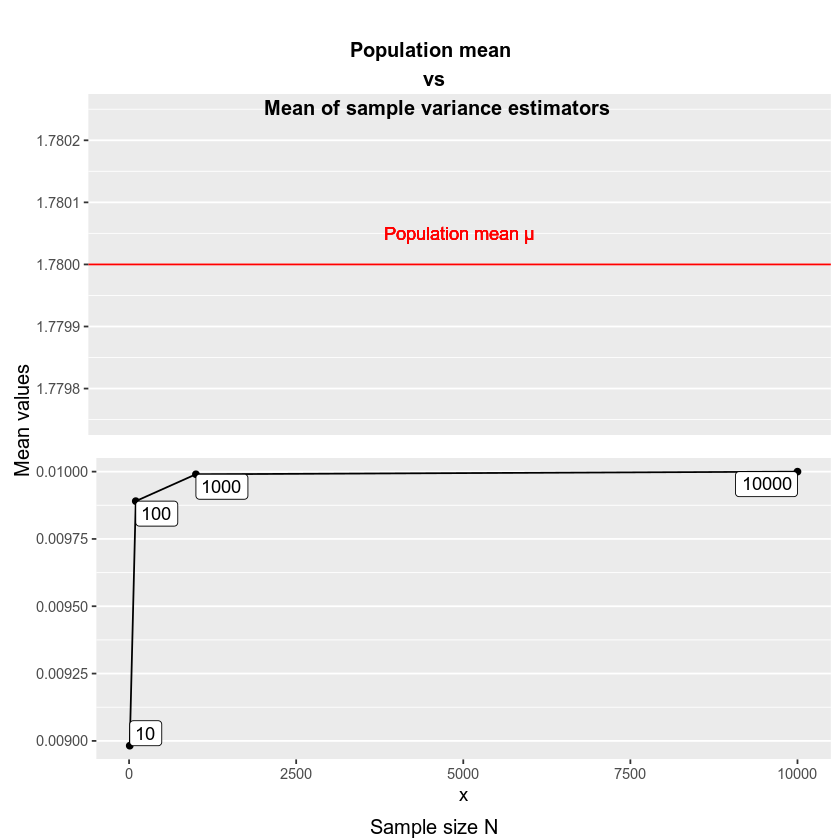

In [53]:
y <- c(mean_sample_var_10, mean_sample_var_100, mean_sample_var_1000, mean_sample_var_10000)

df <- data.frame(x = x, y = y)

p <- ggplot(df, aes(x, y)) +
        geom_line() +
        geom_point() +
        geom_label(label = as.character(x), vjust = 'inward', hjust = 'inward') +
        theme(axis.title.y = element_blank(),
              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.minor.x = element_blank())

        

q <- ggplot(df, aes(x, y)) +
     geom_hline(yintercept = population_mean, col = 'red') +
     geom_text(aes(1000, population_mean + 0.00005), label = 'Population mean μ', col = 'red') +
     scale_y_continuous(limits = c(population_mean - 0.00025, population_mean + 0.00025)) +
     theme(axis.title.x = element_blank(),
           axis.text.x  = element_blank(),
           axis.ticks.x = element_blank(),
           axis.title.y = element_blank(),
           panel.border = element_blank(),
           panel.grid.major.x = element_blank(),
           panel.grid.minor.x = element_blank())


grid.arrange(arrangeGrob(q + theme(legend.position = "none"),
                         p + theme(legend.position = "none"),
                         ncol = 1,
                         top = textGrob(paste("Population mean", '\n', 'vs', '\n', 'Mean of sample variance estimators'), vjust = 1, gp = gpar(fontface = "bold", cex = 1))),
                         left = textGrob("Mean values", rot = 90, vjust = 1),
                         bottom = textGrob("Sample size N"))

## VARIANZA DE LOS ESTIMADORES VARIANZA MUESTRAL

Para las M = 10000 muestras de tamaño N=10, empleamos los estimadores varianza muestral $\{T_{i,N}\}_{i=1}^{M}$:

In [54]:
var_sample_var_10 <- var(sample_var_10)

In [55]:
print(paste('Varianza de los estimadores varianza muestral {T_{i,10}\'}_{i=1}^{M}$: ',
            var_sample_var_10))

[1] "Varianza de los estimadores varianza muestral {T_{i,10}'}_{i=1}^{M}$:  1.7902471458968e-05"


Para las  M = 10000 muestras de tamaño N=100, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [56]:
var_sample_var_100 <- var(sample_var_100)

In [57]:
print(paste('Varianza de los estimadores varianza muestral {T_{i,100}\'}_{i=1}^{M}$: ',
            var_sample_var_100))

[1] "Varianza de los estimadores varianza muestral {T_{i,100}'}_{i=1}^{M}$:  1.97340021001577e-06"


Para las  M = 10000 muestras de tamaño N=1000, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [58]:
var_sample_var_1000 <- var(sample_var_1000)

In [59]:
print(paste('Varianza de los estimadores varianza muestral {T_{i,1000}\'}_{i=1}^{M}$: ',
            var_sample_var_1000))

[1] "Varianza de los estimadores varianza muestral {T_{i,1000}'}_{i=1}^{M}$:  2.02177639910678e-07"


Para las  M = 10000 muestras de tamaño N=10000, empleamos los estimadores varianza muestral $\{T_{i,N}'\}_{i=1}^{M}$:

In [60]:
var_sample_var_10000 <- var(sample_var_10000)

In [61]:
print(paste('Varianza de los estimadores varianza muestral {T_{i,10000}\'}_{i=1}^{M}$: ',
            var_sample_var_10000))

[1] "Varianza de los estimadores varianza muestral {T_{i,10000}'}_{i=1}^{M}$:  1.95705824628484e-08"


<font color='green'>**Sí modifico este plot. Dejo la idea anterior comentada y pongo la corrección en la siguienrte celda.**</font>

<font color='green'>Dado que los puntos de las varianzas de los de los $M$ estimadores varianza muestral para cada $N$ quedan muy por debajo de la linea que marca la varianza poblacional, mi objetivo es dividir el eje vertical (que contiene los valores de la varianza) en dos intervalos: uno de ellos que contenga los valores de las varianzas de los estimadores y otro que contenga la varianza poblacional.</font>


<font color='green'>Recordemos que estamos considerando $M=10000$ muestras para cada tamaño $N=10,100,1000,10000$. Hemos hecho la varianza para cada muestra (estimador varianza muestral) y, acontinuación, la varianza de todas ellas.<font>
    
    
    
<font color='green'>En el plot, pintamos, en la parte superior, una linea verde que señala la varianza poblacional. En la parte inferior, recogemos las varianzas de los $M$ estimadores varianza muestral para cada $N$, que marcamos con una etiqueta. Unimos los 4 puntos con una linea para que se aprecie mejor la tendencia.<font>

In [62]:
#plot(x    = x, 
#     y    = c(var_sample_var_10, var_sample_var_100, var_sample_var_1000, var_sample_var_10000),
#     ylim = c(0, population_sd ^ 2),
#     xaxt = 'n',
#     xlab = 'Size N=10,100,1000,10000',
#     ylab = 'Variance')   
#axis(side = 1, at = x, labels = F, las = 2)
#abline(h = population_sd ^ 2, col = 'red')
#legend("bottomright", legend = "Thoretical var  σ^2", pch = "|", col = "red")

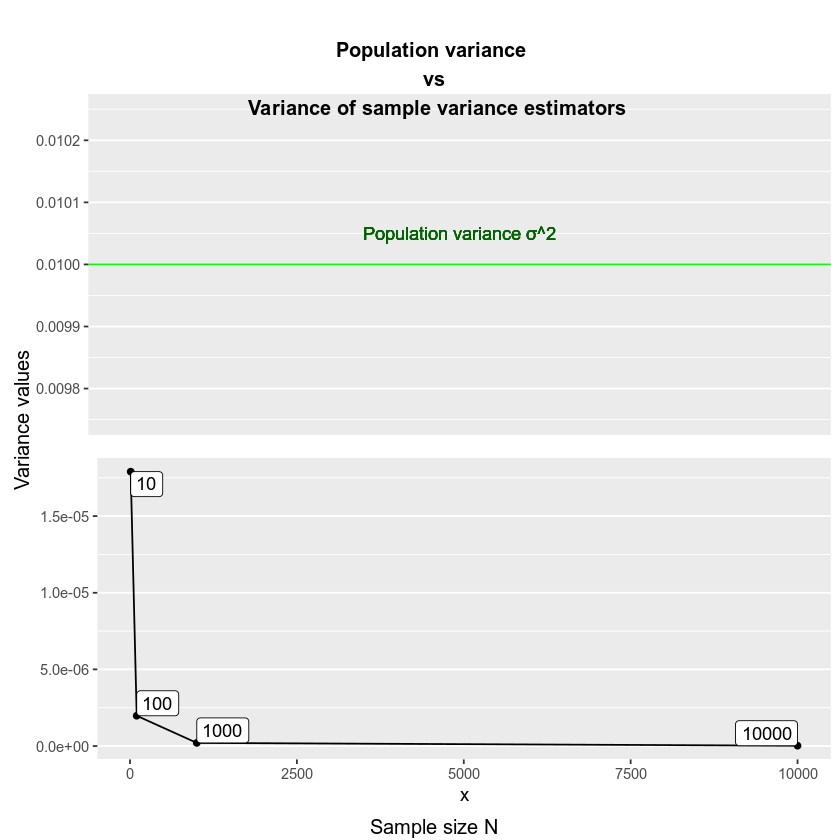

In [63]:
y <- c(var_sample_var_10, var_sample_var_100, var_sample_var_1000, var_sample_var_10000)

df <- data.frame(x = x, y = y)

p <- ggplot(df, aes(x, y)) +
        geom_line() +
        geom_point() +
        geom_label(label = as.character(x), vjust = 'inward', hjust = 'inward') +
        theme(axis.title.y = element_blank(),
              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.minor.x = element_blank())

        

q <- ggplot(df, aes(x, y)) +
     geom_hline(yintercept = population_sd ^ 2, col = 'green') +
     geom_text(aes(1000, population_sd ^ 2 + 0.00005), label = 'Population variance σ^2', col = 'darkgreen') +
     scale_y_continuous(limits = c(population_sd ^ 2 - 0.00025, population_sd ^ 2 + 0.00025)) +
     theme(axis.title.x = element_blank(),
           axis.text.x  = element_blank(),
           axis.ticks.x = element_blank(),
           axis.title.y = element_blank(),
           panel.border = element_blank(),
           panel.grid.major.x = element_blank(),
           panel.grid.minor.x = element_blank())


grid.arrange(arrangeGrob(q + theme(legend.position = "none"),
                         p + theme(legend.position = "none"),
                         ncol = 1,
                         top = textGrob(paste("Population variance", '\n', 'vs', '\n', 'Variance of sample variance estimators'), vjust = 1, gp = gpar(fontface = "bold", cex = 1))),
                         left = textGrob("Variance values", rot = 90, vjust = 1),
                         bottom = textGrob("Sample size N"))

# ESTIMADOR MEDIANA MUESTRAL

<font color='blue'>***4.- Repetir 2) pero usando el estimador "mediana muestral".***</font>

Diremos que $T_{i,N}''$ es el valor del estimador varianza muestral para la muestra $i=1,2,...,M$ de tamaño $N$. 


Para las M=10000 muestras de tamaño N=10 que teniamos almacenadas en la matriz `sample_10`, calculamos la mediana por columnas. 

In [64]:
sample_median_10 <- apply(sample_10, 2, median)

Para las M=10000 muestras de tamaño N=100 que teniamos almacenadas en la matriz `sample_100`, calculamos la varianza por columnas.

In [65]:
sample_median_100 <- apply(sample_100, 2, median)

Para las M=10000 muestras de tamaño N=1000 que teniamos almacenadas en la matriz `sample_1000`, calculamos la varianza por columnas.

In [66]:
sample_median_1000 <- apply(sample_1000, 2, median)

Para las M=10000 muestras de tamaño N=10000 que teniamos almacenadas en la matriz `sample_10000`, calculamos la varianza por columnas.

In [67]:
sample_median_10000 <- apply(sample_10000, 2, median)

## MEDIA DE LOS ESTIMADORES MEDIANA MUESTRAL

<font color='red'>**Mismo problema al señalado antes en rojo**</font>

Para las M = 10000 muestras de tamaño N=10, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [68]:
mean_sample_median_10 <- mean(sample_median_10)

In [69]:
print(paste('Esperanza de los estimadores mediana muestral {T_{i,10}\'\'}_{i=1}^{M}$: ',
            mean_sample_median_10))

[1] "Esperanza de los estimadores mediana muestral {T_{i,10}''}_{i=1}^{M}$:  1.7800719523243"


Para las  M = 10000 muestras de tamaño N=100, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [70]:
mean_sample_median_100 <- mean(sample_median_100)

In [71]:
print(paste('Esperanza de los estimadores mediana muestral {T_{i,100}\'\'}_{i=1}^{M}$: ',
            mean_sample_median_100))

[1] "Esperanza de los estimadores mediana muestral {T_{i,100}''}_{i=1}^{M}$:  1.78001118952662"


Para las  M = 10000 muestras de tamaño N=1000, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [72]:
mean_sample_median_1000 <- mean(sample_median_1000)

In [73]:
print(paste('Esperanza de los estimadores mediana muestral {T_{i,1000}\'\'}_{i=1}^{M}$: ',
            mean_sample_median_1000))

[1] "Esperanza de los estimadores mediana muestral {T_{i,1000}''}_{i=1}^{M}$:  1.78001390462534"


Para las  M = 10000 muestras de tamaño N=10000, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [74]:
mean_sample_median_10000 <- mean(sample_median_10000)

In [75]:
print(paste('Esperanza de los estimadores mediana muestral {T_{i,10000}\'\'}_{i=1}^{M}$: ',
            mean_sample_median_10000))

[1] "Esperanza de los estimadores mediana muestral {T_{i,10000}''}_{i=1}^{M}$:  1.78002654289811"


Dibujamos el resultado. En el eje horizontal, situamos el tamaño muestral N. En el eje vertical, situamos el valor esperado:

<font color='green'>**Sí modifico este plot. Lo dejo comemtado y pongo la corrección en la siguienrte celda. Para cambiar la 
 escala en el eje vertical, lo dividiré en dos. Sitúo la leyenda en otra posición.**</font>
 
 <font color='green'>En este caso, no hace falta sewguir la filosofía anterior, pues los valores se acercan a la media poblaiconal.</font>

In [76]:
#plot(x    = x, 
#     y    = c(mean_sample_median_10, mean_sample_median_100, mean_sample_median_1000, mean_sample_median_10000),
#     ylim = c(0, population_mean),
#     xaxt = 'n',
#     xlab = 'Size N=10,100,1000,10000',
#     ylab = 'Mean')   
#axis(side = 1, at = x, labels = F, las = 2)
#abline(h = population_mean, col = 'red')
#legend("bottomright", legend = "Thoretical mean μ", pch = "|", col = "red")

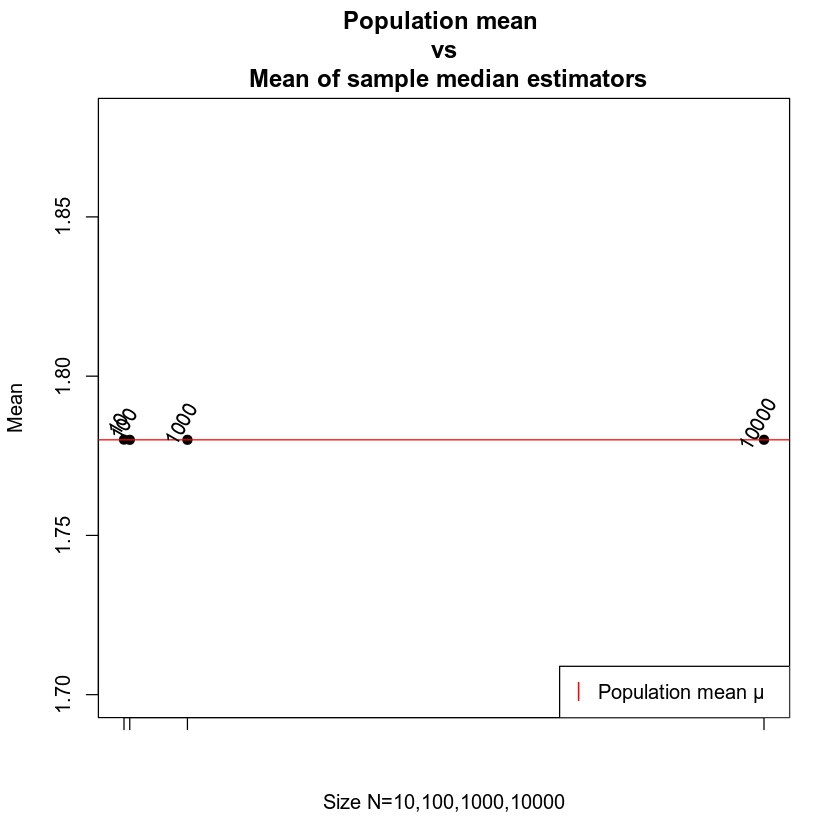

In [77]:
y <- c(mean_sample_median_10, mean_sample_median_100, mean_sample_median_1000, mean_sample_median_10000)

plot(x    = x, 
     y    = y,
     ylim = c(1.7, population_mean + 0.1),
     xaxt = 'n',
     xlab = 'Size N=10,100,1000,10000',
     ylab = 'Mean',
     main = paste("Population mean", '\n', 'vs', '\n', 'Mean of sample median estimators'),
     pch  = 19)   
axis(side = 1, at = x, labels = F, las = 2)
abline(h = population_mean, col = 'red')
text(x, y, as.character(x), srt = 60, pos = 3)
legend("bottomright", legend = "Population mean μ", pch = "|", col = "red")

## VARIANZA DE LOS ESTIMADORES MEDIANA MUESTRAL

Para las M = 10000 muestras de tamaño N=10 , empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [78]:
var_sample_median_10 <- var(sample_median_10)

In [79]:
print(paste('Varianza de los estimadores mediana muestral {T_{i,10}\'\'}_{i=1}^{M}$: ',
            var_sample_median_10))

[1] "Varianza de los estimadores mediana muestral {T_{i,10}''}_{i=1}^{M}$:  0.00139490552968869"


Para las  M = 10000 muestras de tamaño N=100, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [80]:
var_sample_median_100 <- var(sample_median_100)

In [81]:
print(paste('Varianza de los estimadores mediana muestral {T_{i,100}\'\'}_{i=1}^{M}$: ',
            var_sample_median_100))

[1] "Varianza de los estimadores mediana muestral {T_{i,100}''}_{i=1}^{M}$:  0.000157031461946916"


Para las  M = 10000 muestras de tamaño N=1000, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [82]:
var_sample_median_1000 <- var(sample_median_1000)

In [83]:
print(paste('Varianza de los estimadores mediana muestral {T_{i,1000}\'\'}_{i=1}^{M}$: ',
            var_sample_median_1000))

[1] "Varianza de los estimadores mediana muestral {T_{i,1000}''}_{i=1}^{M}$:  1.55994778116036e-05"


Para las  M = 10000 muestras de tamaño N=10000, empleamos los estimadores mediana muestral $\{T_{i,N}''\}_{i=1}^{M}$:

In [84]:
var_sample_median_10000 <- var(sample_median_10000)

In [85]:
print(paste('Varianza de los estimadores mediana muestral {T_{i,10000}\'\'}_{i=1}^{M}$: ',
            var_sample_median_10000))

[1] "Varianza de los estimadores mediana muestral {T_{i,10000}''}_{i=1}^{M}$:  1.53356358656981e-06"


<font color='green'>**Sí modifico este plot. Lo dejo comemtado y pongo la corrección en la siguienrte celda. Para cambiar la escala en el eje vertical, lo dividiré en dos. Sitúo la leyenda en otra posición.**</font>


<font color='green'>Dado que los puntos de las varianzas de los de los $M$ estimadores mediana muestral para cada $N$ quedan muy por debajo de la linea que marca la varianza poblacional, mi objetivo es dividir el eje vertical (que contiene los valores de la varianza) en dos intervalos: uno de ellos que contenga los valores de las varianzas de los estimadores y otro que contenga la varianza poblacional.</font>


<font color='green'>Recordemos que estamos considerando $M=10000$ muestras para cada tamaño $N=10,100,1000,10000$. Hemos hecho la mediana para cada muestra (estimador mediana muestral) y, acontinuación, la varianza de todas ellas.<font>
    
    
    
<font color='green'>En el plot, pintamos, en la parte superior, una linea verde que señala la varianza poblacional. En la parte inferior, recogemos las varianzas de los $M$ estimadores mediana muestral para cada $N$, que marcamos con una etiqueta. Unimos los 4 puntos con una linea para que se aprecie mejor la tendencia.<font>

In [86]:
#plot(x    = x, 
#     y    = c(var_sample_median_10, var_sample_median_100, var_sample_median_1000, var_sample_median_10000),
#     ylim = c(0, population_sd ^ 2),
#     xaxt = 'n',
#     xlab = 'Size N=10,100,1000,10000',
#     ylab = 'Variance')   
#axis(side = 1, at = x, labels = F, las = 2)
#abline(h = population_sd ^ 2, col = 'red')
#legend("bottomright", legend = "Thoretical var  σ^2", pch = "|", col = "red")

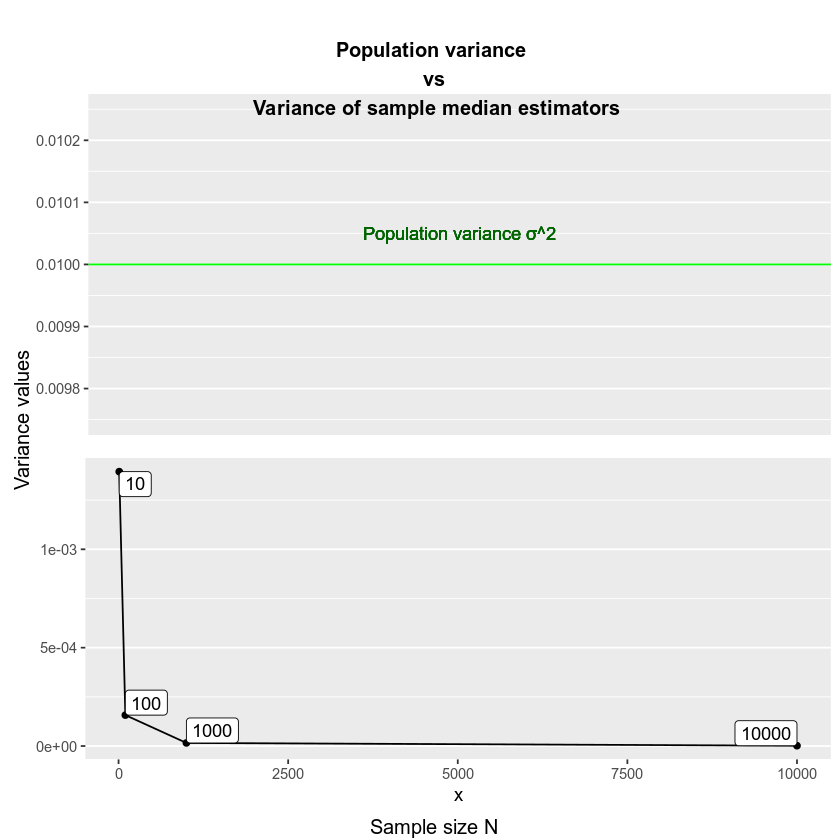

In [87]:
y <- c(var_sample_median_10, var_sample_median_100, var_sample_median_1000, var_sample_median_10000)

df <- data.frame(x = x, y = y)

p <- ggplot(df, aes(x, y)) +
        geom_line() +
        geom_point() +
        geom_label(label = as.character(x), vjust = 'inward', hjust = 'inward') +
        theme(axis.title.y = element_blank(),
              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.minor.x = element_blank())
        

q <- ggplot(df, aes(x, y)) +
     geom_hline(yintercept = population_sd ^ 2, col = 'green') +
     geom_text(aes(1000, population_sd ^ 2 + 0.00005), label = 'Population variance σ^2', col = 'darkgreen') +
     scale_y_continuous(limits = c(population_sd ^ 2 - 0.00025, population_sd ^ 2 + 0.00025)) +
     theme(axis.title.x = element_blank(),
           axis.text.x  = element_blank(),
           axis.ticks.x = element_blank(),
           axis.title.y = element_blank(),
           panel.border = element_blank(),
           panel.grid.major.x = element_blank(),
           panel.grid.minor.x = element_blank())


grid.arrange(arrangeGrob(q + theme(legend.position = "none"),
                         p + theme(legend.position = "none"),
                         ncol = 1,
                         top = textGrob(paste("Population variance", '\n', 'vs', '\n', 'Variance of sample median estimators'), vjust = 1, gp = gpar(fontface = "bold", cex = 1))),
                         left = textGrob("Variance values", rot = 90, vjust = 1),
                         bottom = textGrob("Sample size N"))

<font color='blue'>***¿Qué estimador es más eficiente: la media muestral o la mediana muestral?***</font>

Decimos que un estimador es más eficiente que otro estimador si la varianza del primero es menor que la del segundo. Es decir, si $\hat{\theta}_{1}$ y $\hat{\theta}_{2}$ son estimadores de $\theta$ y 
$$Var[\hat{\theta}_{1}] < Var[\hat{\theta}_{2}]$$ 
se dice que $\hat{\theta}_{1}$ es más eficiente que $\hat{\theta}_{2}$.


Sea M=10000. 



Dados los estimadores media muestral para N=10,100,1000,1000 $\{T_{i,N}\}_{i=1}^{M}$, habiamos calculado las varianzas de los mismos y almacenado en las variables `var_sample_mean_10`,`var_sample_mean_100 `,`var_sample_mean_1000`,`var_sample_mean_10000`.

Dados los estimadores mediana muestral para N=10,100,1000,1000 $\{T_{i,N}''\}_{i=1}^{M}$, habiamos calculado las varianzas de los mismos y almacenado en las variables `var_sample_median_10`,`var_sample_median_100 `,`var_sample_median_1000`,`var_sample_median_10000`.


Los comparamos dos a dos para el mismo N

In [88]:
library(foreach)

In [90]:
mean_vars <- c(var_sample_mean_10 , var_sample_mean_100, var_sample_mean_1000, var_sample_mean_10000)
median_vars <- c(var_sample_median_10, var_sample_median_100, var_sample_median_1000, var_sample_median_10000)

foreach (a=mean_vars, b=median_vars, i=c(10,100,1000,1000)) %do% {
    if (a < b){
        paste('For N=',i, 'MEAN estimator is more efficient')
    }
    else{
        paste('For N=',i, 'MEDIAN estimator is more efficient')
    }
}

[[1]]
[1] "For N= 10 MEAN estimator is more efficient"

[[2]]
[1] "For N= 100 MEAN estimator is more efficient"

[[3]]
[1] "For N= 1000 MEDIAN estimator is more efficient"

[[4]]
[1] "For N= 1000 MEAN estimator is more efficient"